# Kahve Satışlarını Artırmak İçin Derin Öğrenme ile Günlük Kar Tahmini ve Analizi

Proje Açıklaması

Projenin Kullanım Alanları ve Faydaları

Görselleştirmeler ve Analizler

In [30]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Veri setini yükle
file_path = r'C:\Users\realb\Desktop\Kahve satışı tahmin modeli/index.csv'
data = pd.read_csv(file_path)

# Veri setinin ilk birkaç satırını görüntüle
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [31]:
# Zaman sütununu datetime formatına çevir ve index olarak ayarla
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

In [32]:
# Veri setinin şekli ve bilgi
print(data.shape)
print(data.info())

(896, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 896 entries, 2024-03-01 10:15:50.520000 to 2024-06-30 21:04:09.746000
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   cash_type    896 non-null    object 
 2   card         807 non-null    object 
 3   money        896 non-null    float64
 4   coffee_name  896 non-null    object 
dtypes: float64(1), object(4)
memory usage: 42.0+ KB
None


In [33]:
# Gerekli sütunları seç
data = data[['coffee_name', 'money']]

In [34]:
# Kategorik değişkenleri (kahve türleri) one-hot encode yap
data = pd.get_dummies(data, columns=['coffee_name'])

In [35]:
# Veriyi normalleştir
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [36]:
# Eğitim ve test veri setlerini ayır
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [37]:
# Zaman serisi verisi oluşturmak için yardımcı fonksiyon
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, 0])  # money sütunu ilk sütun olarak one-hot encoding sonrası olacak
    return np.array(X), np.array(Y)

In [38]:
# Zaman adımını belirle
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [39]:
# Modeli oluştur
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# Modeli eğit
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 3s 54ms/step - loss: 0.2305 - val_loss: 0.1129
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0965 - val_loss: 0.0781
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0810 - val_loss: 0.0736
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0829 - val_loss: 0.0714
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0787 - val_loss: 0.0707
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0781 - val_loss: 0.0700
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0777 - val_loss: 0.0709
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0789 - val_loss: 0.0704
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0800 - val_loss: 0.0704
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0767 - val_loss: 0.0705
Epoch 11

12/12 [==============================] - 0s 7ms/step - loss: 0.0726 - val_loss: 0.0758
Epoch 84/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0758 - val_loss: 0.0718
Epoch 85/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0729 - val_loss: 0.0714
Epoch 86/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0725 - val_loss: 0.0711
Epoch 87/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0737 - val_loss: 0.0708
Epoch 88/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0725 - val_loss: 0.0732
Epoch 89/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0748 - val_loss: 0.0707
Epoch 90/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0762 - val_loss: 0.0710
Epoch 91/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0734 - val_loss: 0.0725
Epoch 92/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0742 - val_loss: 0.0705
Epoch 93/100


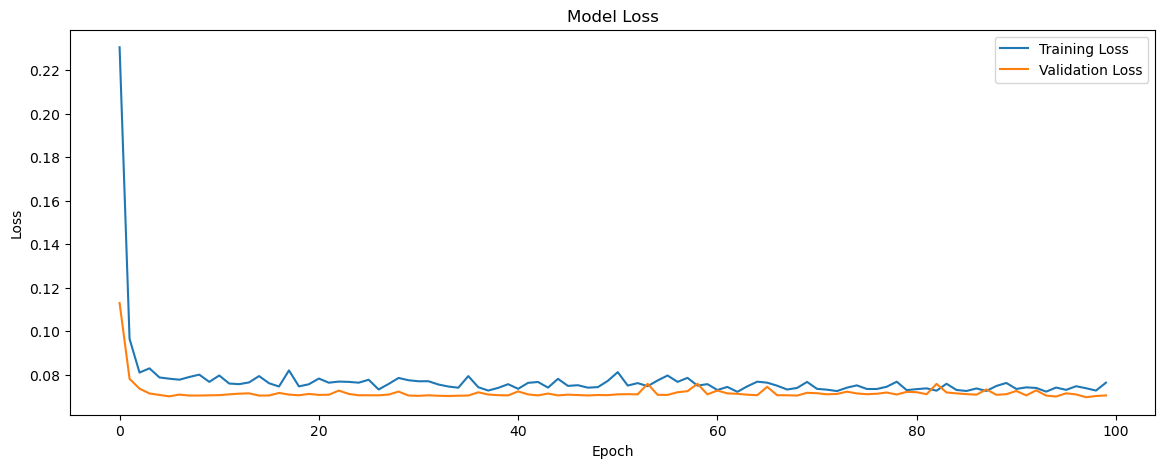

In [41]:
# Modelin eğitim ve doğrulama kayıplarını çiz
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Tahminler yap ve sonuçları ters ölçekle
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(np.concatenate((train_predict, train_data[time_step + 1:, 1:]), axis=1))
test_predict = scaler.inverse_transform(np.concatenate((test_predict, test_data[time_step + 1:, 1:]), axis=1))

6/6 [==============================] - 0s 2ms/step


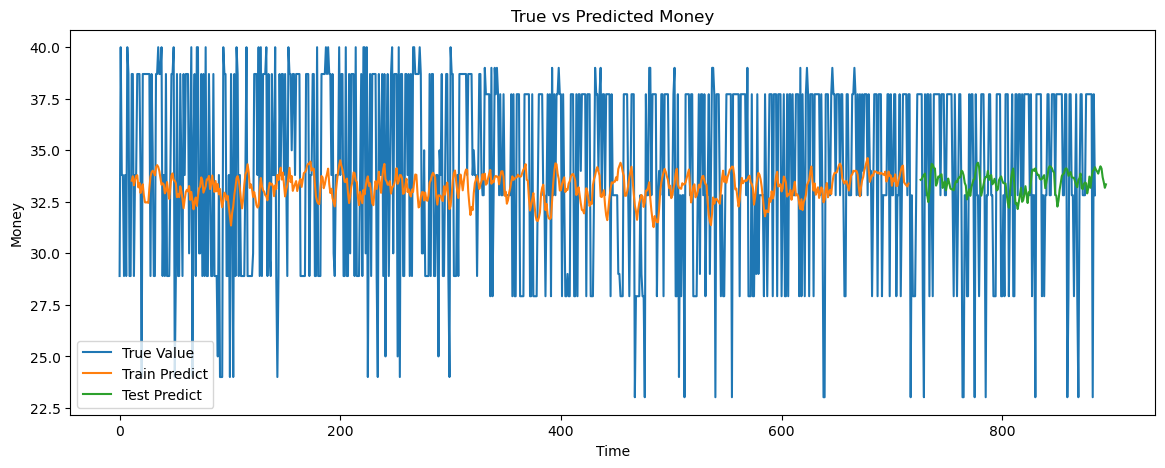

In [43]:
# Gerçek ve tahmin edilen değerleri karşılaştır
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(scaled_data)[time_step + 1:, 0], label='True Value')
plt.plot(range(time_step + 1, len(train_predict) + time_step + 1), train_predict[:, 0], label='Train Predict')
plt.plot(range(len(train_predict) + 2 * time_step + 1, len(train_predict) + 2 * time_step + 1 + len(test_predict)), test_predict[:, 0], label='Test Predict')
plt.title('True vs Predicted Money')
plt.xlabel('Time')
plt.ylabel('Money')
plt.legend()
plt.show()

In [44]:
# Günlük toplam satışları hesapla
daily_data = data.resample('D').sum()

# Günlük kahve türlerinin sayısını hesapla
daily_coffee_counts = data.resample('D').sum()

# Günlük veriyi birleştir
daily_data = pd.concat([daily_data, daily_coffee_counts], axis=1)

print(daily_data.head())


            money  coffee_name_Americano  coffee_name_Americano with Milk  \
datetime                                                                    
2024-03-01  396.3                      1                                4   
2024-03-02  228.1                      3                                3   
2024-03-03  349.1                      1                                2   
2024-03-04  135.2                      0                                1   
2024-03-05  338.5                      0                                0   

            coffee_name_Cappuccino  coffee_name_Cocoa  coffee_name_Cortado  \
datetime                                                                     
2024-03-01                       0                  1                    0   
2024-03-02                       0                  0                    0   
2024-03-03                       0                  1                    2   
2024-03-04                       0                  0                 

In [45]:
# Veriyi normalleştir
scaler = MinMaxScaler()
scaled_daily_data = scaler.fit_transform(daily_data)

In [46]:
# Eğitim ve test veri setlerini ayır
train_size = int(len(scaled_daily_data) * 0.8)
train_daily_data = scaled_daily_data[:train_size]
test_daily_data = scaled_daily_data[train_size:]

In [47]:
# Zaman serisi verisi oluşturmak için yardımcı fonksiyon
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, 0])  # money sütunu ilk sütun olarak one-hot encoding sonrası olacak
    return np.array(X), np.array(Y)


In [48]:
# Zaman adımını belirle
time_step = 10
X_train_daily, y_train_daily = create_dataset(train_daily_data, time_step)
X_test_daily, y_test_daily = create_dataset(test_daily_data, time_step)

In [49]:
# Modeli oluştur
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train_daily.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
# Modeli eğit
history = model.fit(X_train_daily, y_train_daily, batch_size=64, epochs=100, validation_data=(X_test_daily, y_test_daily))

Epoch 1/100
2/2 [==============================] - 3s 555ms/step - loss: 0.1891 - val_loss: 0.0439
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0700 - val_loss: 0.0383
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0531 - val_loss: 0.0820
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0882 - val_loss: 0.0655
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0582 - val_loss: 0.0381
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0486 - val_loss: 0.0283
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0472 - val_loss: 0.0296
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0502 - val_loss: 0.0315
Epoch 9/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0549 - val_loss: 0.0306
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0486 - val_loss: 0.0292
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0378 - val_loss: 0.0339
Epoch 85/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0382 - val_loss: 0.0336
Epoch 86/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0402 - val_loss: 0.0337
Epoch 87/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0400 - val_loss: 0.0333
Epoch 88/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0357 - val_loss: 0.0332
Epoch 89/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0367 - val_loss: 0.0336
Epoch 90/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0373 - val_loss: 0.0340
Epoch 91/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0400 - val_loss: 0.0331
Epoch 92/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0327 - val_loss: 0.0330
Epoch 93/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0360 - val_loss: 0.0337
Epoch 94/1

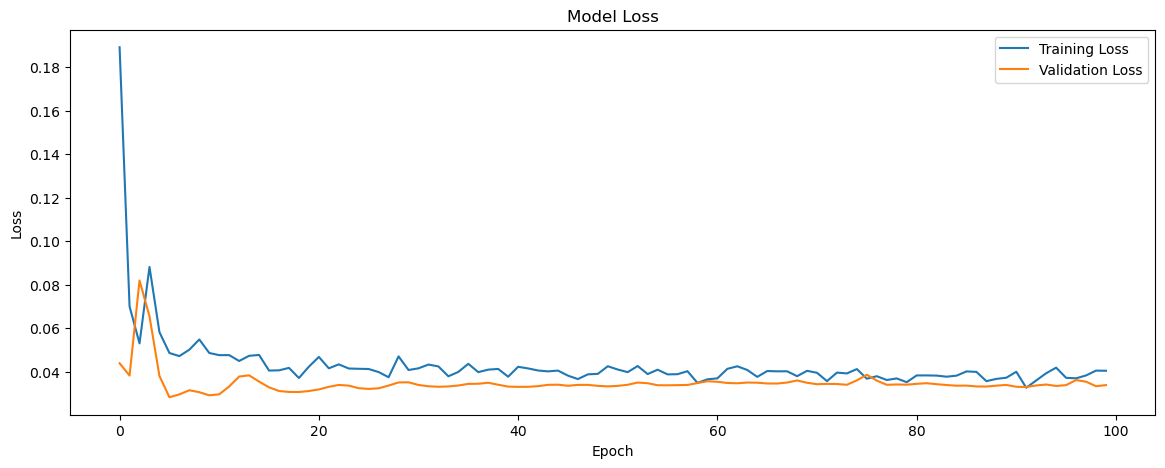

In [51]:
# Modelin eğitim ve doğrulama kayıplarını çiz
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
# Tahminler yap ve sonuçları ters ölçekle
train_predict_daily = model.predict(X_train_daily)
test_predict_daily = model.predict(X_test_daily)

train_predict_daily = scaler.inverse_transform(np.concatenate((train_predict_daily, train_daily_data[time_step + 1:, 1:]), axis=1))
test_predict_daily = scaler.inverse_transform(np.concatenate((test_predict_daily, test_daily_data[time_step + 1:, 1:]), axis=1))


1/1 [==============================] - 0s 14ms/step


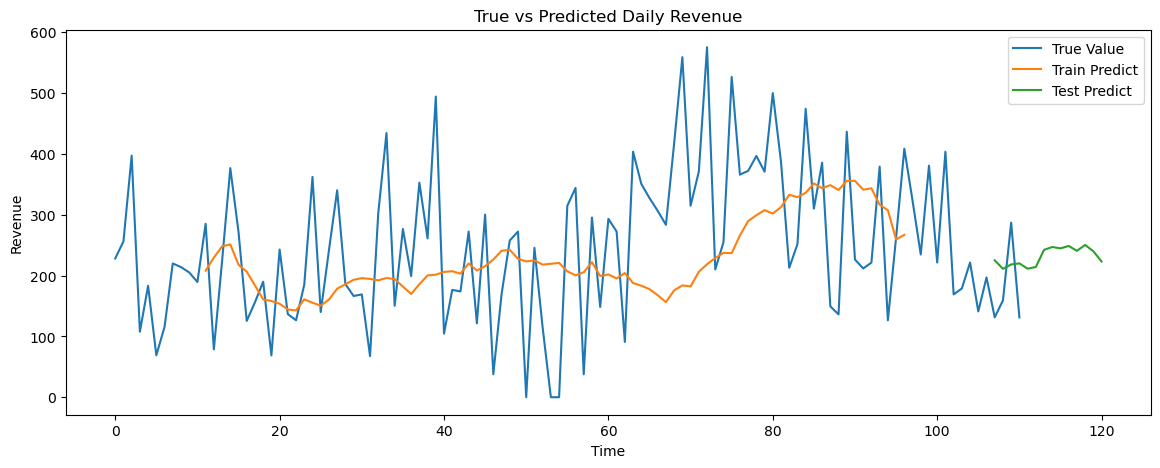

In [53]:
# Gerçek ve tahmin edilen değerleri karşılaştır
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(scaled_daily_data)[time_step + 1:, 0], label='True Value')
plt.plot(range(time_step + 1, len(train_predict_daily) + time_step + 1), train_predict_daily[:, 0], label='Train Predict')
plt.plot(range(len(train_predict_daily) + 2 * time_step + 1, len(train_predict_daily) + 2 * time_step + 1 + len(test_predict_daily)), test_predict_daily[:, 0], label='Test Predict')
plt.title('True vs Predicted Daily Revenue')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [54]:
# Mevcut sütun isimlerini kontrol et
print(data.columns)

# 'datetime' sütununun olup olmadığını kontrol et ve mevcut sütunu kullan
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)
elif 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
else:
    print("Veri çerçevesinde 'datetime' veya 'date' sütunu bulunamadı.")

# Sütun isimlerini ve veri tiplerini kontrol et
print(data.columns)
print(data.dtypes)

Index(['money', 'coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Cappuccino', 'coffee_name_Cocoa', 'coffee_name_Cortado',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate',
       'coffee_name_Latte'],
      dtype='object')
Veri çerçevesinde 'datetime' veya 'date' sütunu bulunamadı.
Index(['money', 'coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Cappuccino', 'coffee_name_Cocoa', 'coffee_name_Cortado',
       'coffee_name_Espresso', 'coffee_name_Hot Chocolate',
       'coffee_name_Latte'],
      dtype='object')
money                              float64
coffee_name_Americano                 bool
coffee_name_Americano with Milk       bool
coffee_name_Cappuccino                bool
coffee_name_Cocoa                     bool
coffee_name_Cortado                   bool
coffee_name_Espresso                  bool
coffee_name_Hot Chocolate             bool
coffee_name_Latte                     bool
dtype: object


In [55]:
# Günlük toplam satışları hesapla
daily_revenue = data.resample('D').sum()['money']

# Günlük kahve türlerinin sayısını hesapla
daily_coffee_counts = data.groupby(data.index.date)[data.columns[1:]].sum()

# Günlük veriyi birleştir
daily_data = pd.concat([daily_revenue, daily_coffee_counts], axis=1)

print(daily_data.head())

                     money  coffee_name_Americano  \
2024-03-01 00:00:00  396.3                    NaN   
2024-03-02 00:00:00  228.1                    NaN   
2024-03-03 00:00:00  349.1                    NaN   
2024-03-04 00:00:00  135.2                    NaN   
2024-03-05 00:00:00  338.5                    NaN   

                     coffee_name_Americano with Milk  coffee_name_Cappuccino  \
2024-03-01 00:00:00                              NaN                     NaN   
2024-03-02 00:00:00                              NaN                     NaN   
2024-03-03 00:00:00                              NaN                     NaN   
2024-03-04 00:00:00                              NaN                     NaN   
2024-03-05 00:00:00                              NaN                     NaN   

                     coffee_name_Cocoa  coffee_name_Cortado  \
2024-03-01 00:00:00                NaN                  NaN   
2024-03-02 00:00:00                NaN                  NaN   
2024-03-03 

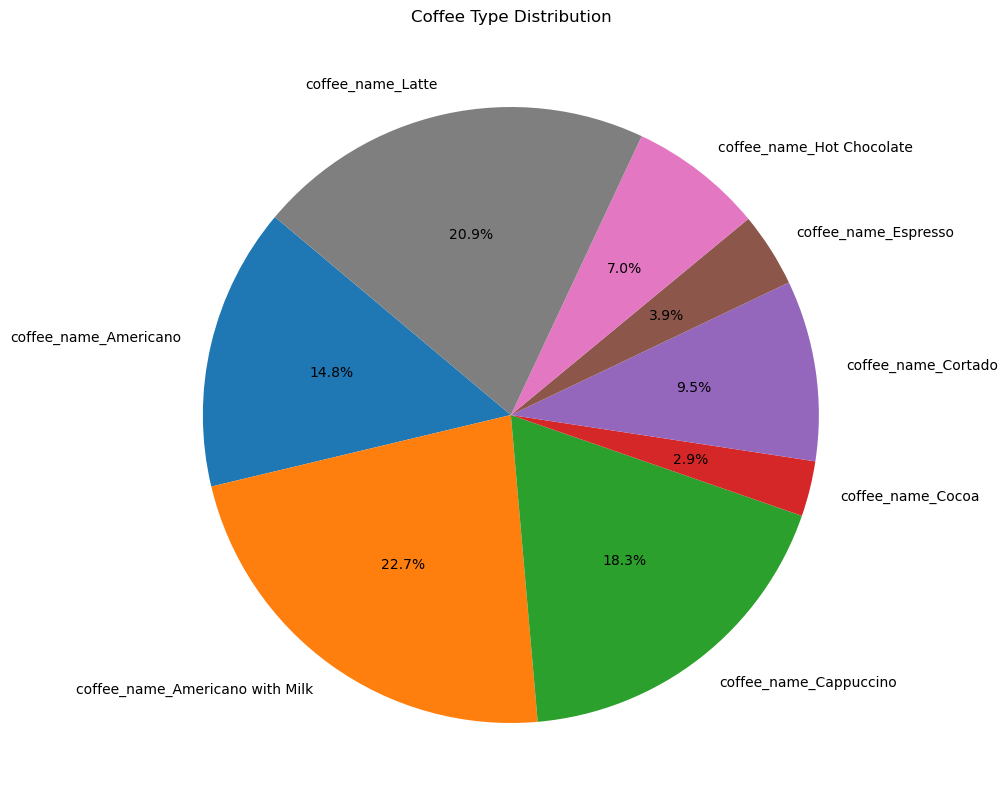

In [56]:
# Kahve türlerinin günlük dağılımını pasta grafiği ile görselleştir
daily_coffee_counts_sum = daily_coffee_counts.sum()
plt.figure(figsize=(10, 10))
plt.pie(daily_coffee_counts_sum, labels=daily_coffee_counts_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Coffee Type Distribution')
plt.show()

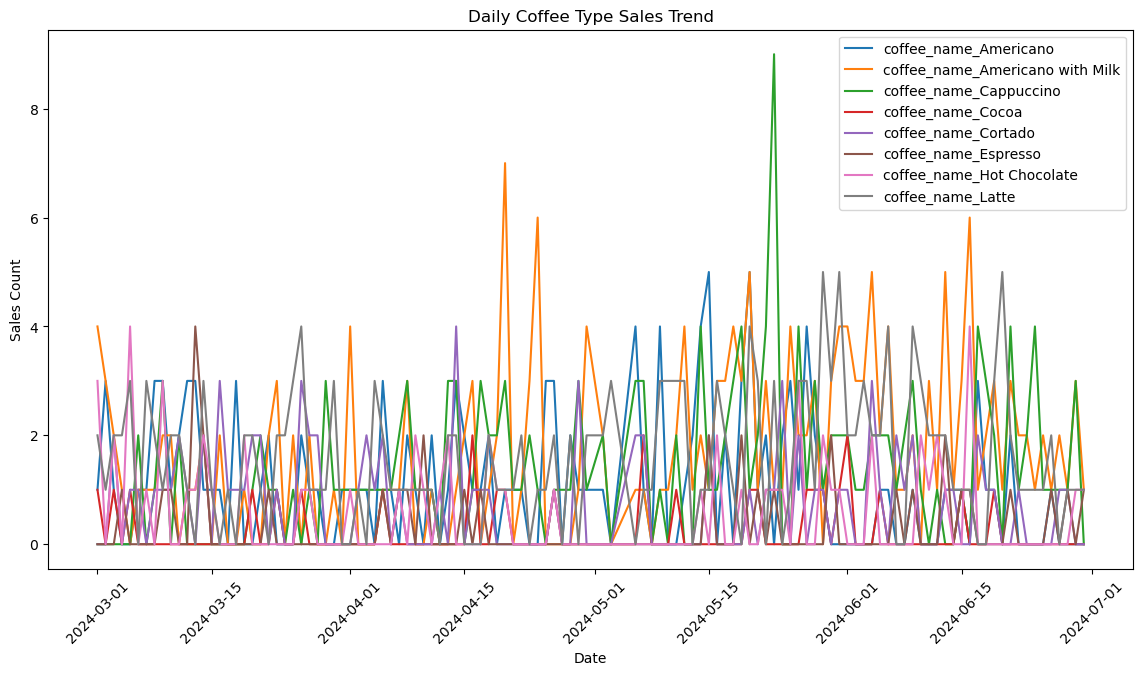

In [57]:
# Kahve türlerinin günlük satış trendini çizgi grafiği ile görselleştir
plt.figure(figsize=(14, 7))
for column in daily_coffee_counts.columns:
    plt.plot(daily_coffee_counts.index, daily_coffee_counts[column], label=column)
plt.title('Daily Coffee Type Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

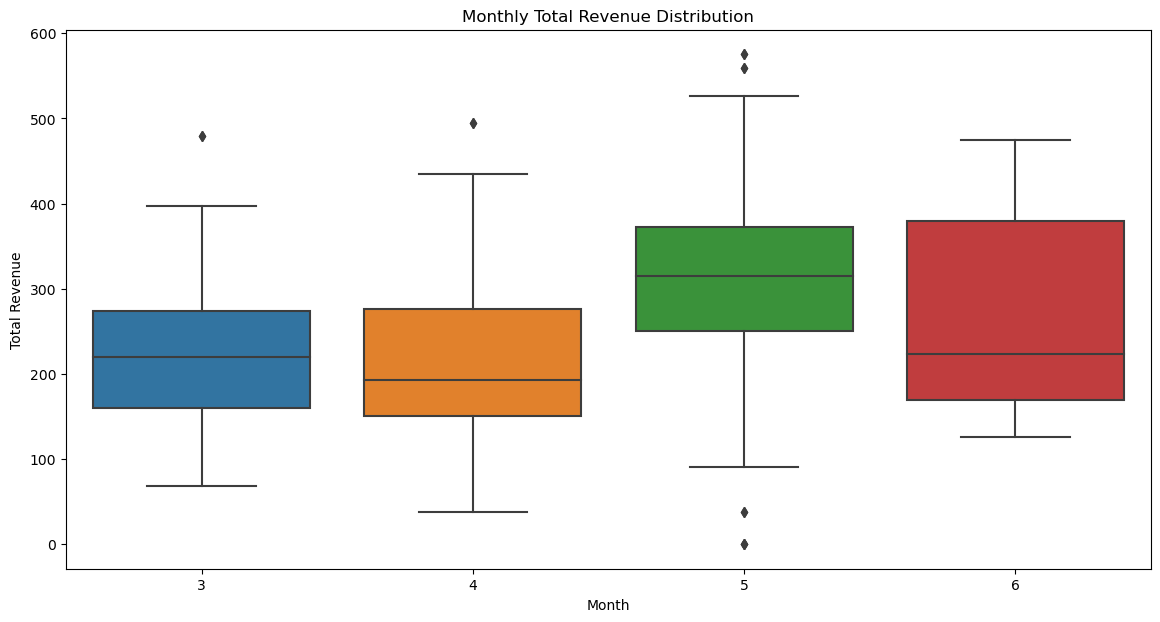

In [58]:
# Günlük toplam satışları kutu grafiği ile görselleştir
daily_data['month'] = [date.month for date in daily_data.index]
plt.figure(figsize=(14, 7))
sns.boxplot(x=daily_data['month'], y=daily_data['money'])
plt.title('Monthly Total Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()